# 0.0 Imports

In [163]:
import numpy as np
import pandas as pd
import psycopg2 as pg
import sweetviz as sv
import seaborn as sns
from matplotlib import pyplot as plt

# 0.1 Load Dataset

In [106]:
# Credentials

host = 'comunidade-ds-postgres.c50pcakiuwi3.us-east-1.rds.amazonaws.com'
port = 5432
database = 'comunidadedsdb'
username = 'member'
pwd =' cdspa'

# Connection with Database
conn_string = f'host={host} port={port} dbname={database} user={username} password={pwd}'
conn = pg.connect(conn_string)

# SQL Query
query = '''
    select * 
    from pa004.users u LEFT JOIN pa004.vehicle v ON (u.id = v.id)
                       LEFT JOIN pa004.insurance i ON (u.id = i.id)
'''

df = pd.read_sql(query, conn)
conn.close()
df.head()

C:\Users\Notebook\anaconda3\envs\insurance-cross-sell-env\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,id,gender,age,region_code,policy_sales_channel,id,driving_license,vehicle_age,vehicle_damage,id,previously_insured,annual_premium,vintage,response
0,7,Male,23,11.0,152.0,7,1,< 1 Year,Yes,7,0,23367.0,249,0
1,13,Female,41,15.0,14.0,13,1,1-2 Year,No,13,1,31409.0,221,0
2,18,Female,25,35.0,152.0,18,1,< 1 Year,No,18,1,46622.0,299,0
3,31,Female,26,8.0,160.0,31,1,< 1 Year,No,31,0,2630.0,136,0
4,39,Male,45,8.0,124.0,39,1,1-2 Year,Yes,39,0,42297.0,264,0


In [107]:
print('Rows: {}'.format(df.shape[0]))
print('Columns: {}'.format(df.shape[1]))

Rows: 381109
Columns: 14


In [108]:
df_raw = df.loc[:,~df.columns.duplicated()]
df_raw.sample(3)

,id,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
90329,339673,Female,71,15.0,14.0,1,1-2 Year,Yes,0,37849.0,208,0
54987,57767,Male,42,28.0,26.0,1,1-2 Year,Yes,0,30261.0,266,1
66434,149503,Female,23,50.0,152.0,1,< 1 Year,Yes,0,22342.0,295,0


# 1.0 Data Description

In [109]:
df1 = df_raw.copy()

## 1.1 Data Dimension

In [110]:
print('Rows: {}'.format(df1.shape[0]))
print('Columns: {}'.format(df1.shape[1]))

Rows: 381109
Columns: 12


## 1.2 Data Types

In [111]:
for att in df1.columns:
    print(att, '({}) : '.format(df1[att].dtype), df1[att].unique(), "\n")

id (int64) :  [     7     13     18 ... 381082 381097 381100] 

gender (object) :  ['Male' 'Female'] 

age (int64) :  [23 41 25 26 45 44 29 31 50 49 59 20 24 22 52 60 55 40 64 69 58 78 34 75
 37 54 46 42 51 76 57 27 38 21 71 77 33 47 72 28 43 39 53 68 62 56 36 35
 30 61 63 66 74 67 32 70 73 48 65 80 79 81 82 84 85 83] 

region_code (float64) :  [11. 15. 35.  8. 28. 39. 29. 30. 25. 22. 36.  0. 26.  6. 48. 47. 33. 41.
 46. 43.  2. 37. 40.  4. 10. 18.  9.  3. 50. 32. 24. 27. 34. 21. 45. 12.
  5. 49. 14. 16. 13. 31. 23.  1. 42.  7. 17. 44. 19. 38. 20. 52. 51.] 

policy_sales_channel (float64) :  [152.  14. 160. 124.  13.  26. 151. 157. 156. 122.  23.  11. 163.  12.
 154.  31.  19. 120.  55.  56.  24.   8.  10.   9.  61.  29.  52.  22.
 150. 147.  15. 155.  60.   7. 125.  30.  18.  25. 145. 158. 139. 135.
 136. 131.   3.   1. 127. 105.  16. 140.  91. 128. 113.  94. 132.  54.
  42. 103. 153.   4.  51. 116.  36. 107. 146. 108.  47. 138. 111.  35.
 114.  45.  86. 121. 123. 109.  59. 119.  37. 

## 1.3 Check NA

In [112]:
df1.isna().sum()

id                      0
gender                  0
age                     0
region_code             0
policy_sales_channel    0
driving_license         0
vehicle_age             0
vehicle_damage          0
previously_insured      0
annual_premium          0
vintage                 0
response                0
dtype: int64

## 1.4 Data Descriptive

In [113]:
num_attributes = df1.select_dtypes(include=['int64','float64'])
cat_attributes = df1.select_dtypes(exclude=['int64','float64'])

### 1.4.1 Numerical atributes

In [114]:
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.mean)).T

d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max','range','mean','median','std','skew','kurtosis']

m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1.0,381109.0,381108.0,190555.000000,190555.000000,110016.691870,-8.071174e-18,-1.200000
1,age,20.0,85.0,65.0,38.822584,38.822584,15.511591,6.725390e-01,-0.565655
2,region_code,0.0,52.0,52.0,26.388807,26.388807,13.229871,-1.152664e-01,-0.867857
3,policy_sales_channel,1.0,163.0,162.0,112.034295,112.034295,54.203924,-9.000081e-01,-0.970810
4,driving_license,0.0,1.0,1.0,0.997869,0.997869,0.046109,-2.159518e+01,464.354302
5,previously_insured,0.0,1.0,1.0,0.458210,0.458210,0.498251,1.677471e-01,-1.971871
6,annual_premium,2630.0,540165.0,537535.0,30564.389581,30564.389581,17213.132474,1.766087e+00,34.004569
7,vintage,10.0,299.0,289.0,154.347397,154.347397,83.671194,3.029517e-03,-1.200688
8,response,0.0,1.0,1.0,0.122563,0.122563,0.327935,2.301906e+00,3.298788


# 2.0 Feature Engineering

In [115]:
df2 = df1.copy()

In [116]:
df2['vehicle_age'].unique()

array(['< 1 Year', '1-2 Year', '> 2 Years'], dtype=object)

In [117]:
df2.head()

,id,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
0,7,Male,23,11.0,152.0,1,< 1 Year,Yes,0,23367.0,249,0
1,13,Female,41,15.0,14.0,1,1-2 Year,No,1,31409.0,221,0
2,18,Female,25,35.0,152.0,1,< 1 Year,No,1,46622.0,299,0
3,31,Female,26,8.0,160.0,1,< 1 Year,No,0,2630.0,136,0
4,39,Male,45,8.0,124.0,1,1-2 Year,Yes,0,42297.0,264,0


In [118]:
# vericle_age
df2['vehicle_age'] = df2['vehicle_age'].apply(lambda x: 'bellow_1_year' if x == '< 1 Year' else 
                                                     'between_1_2_year' if x == '1-2 Year' else 
                                                     'over_2_years')
df2['vehicle_damage'] = df2['vehicle_damage'].map({'Yes':1,'No':0}) 

In [119]:
df2.head()

,id,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
0,7,Male,23,11.0,152.0,1,bellow_1_year,1,0,23367.0,249,0
1,13,Female,41,15.0,14.0,1,between_1_2_year,0,1,31409.0,221,0
2,18,Female,25,35.0,152.0,1,bellow_1_year,0,1,46622.0,299,0
3,31,Female,26,8.0,160.0,1,bellow_1_year,0,0,2630.0,136,0
4,39,Male,45,8.0,124.0,1,between_1_2_year,1,0,42297.0,264,0


# 3.0 Data Filtering

In [120]:
df3 = df2.copy()

# 4.0 Exploratory Data Analysis

In [121]:
df4 = df3.copy()

In [130]:
report = sv.analyze(df4)
report.show_html()

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### 4.1. Univariate Analysis

In [123]:
# 'gender'

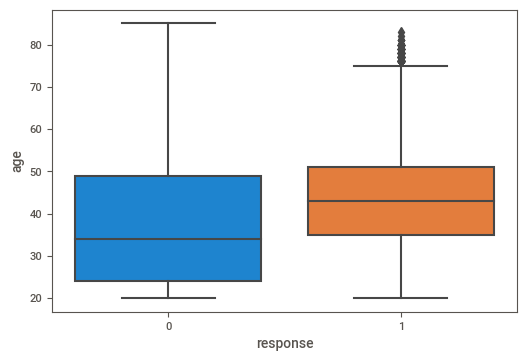

In [137]:
# 'age'
sns.boxplot(x='response',y='age',data=df4);

#### Interesed

#### Not interessed

<AxesSubplot:xlabel='age', ylabel='Count'>

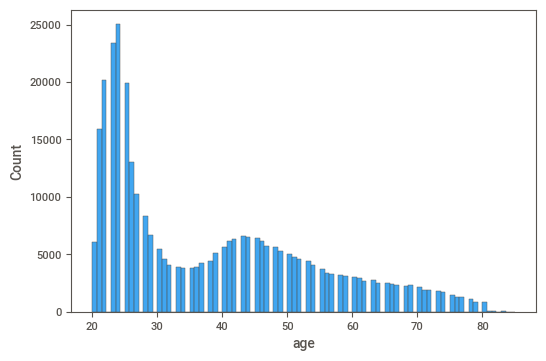

In [143]:
aux00 = df4.loc[df4['response'] == 0, 'age']
sns.histplot(aux00)

<AxesSubplot:xlabel='age', ylabel='Count'>

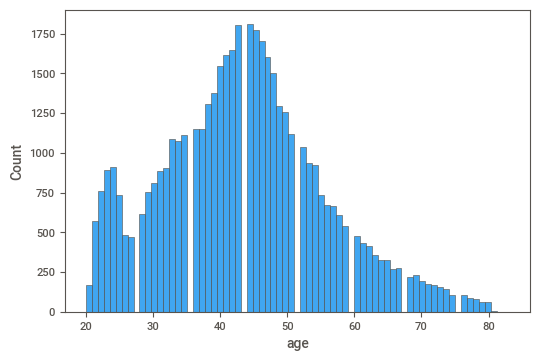

In [144]:
aux00 = df4.loc[df4['response'] == 1, 'age']
sns.histplot(aux00)

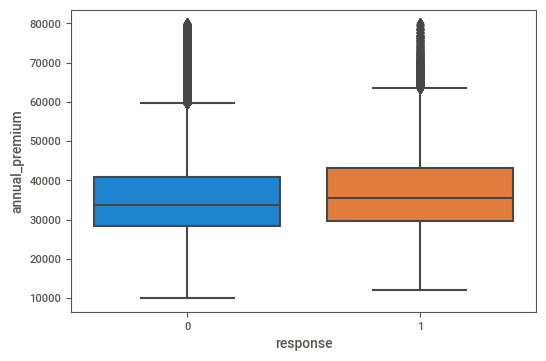

In [153]:
# 'annual_premium'
aux = df4[(df4['annual_premium'] < 80000) & (df4['annual_premium'] > 10000)]
sns.boxplot(x='response',y='annual_premium',data=aux);

#### Interesed

#### Not interessed

<AxesSubplot:xlabel='annual_premium', ylabel='Count'>

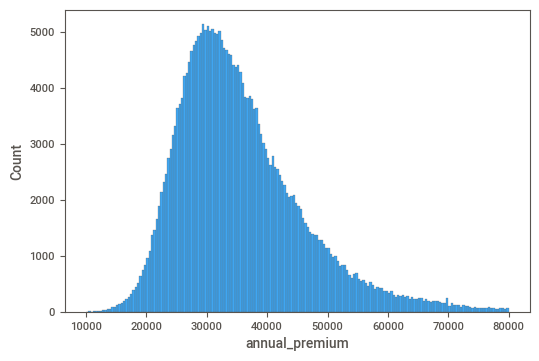

In [154]:
aux00 = aux.loc[aux['response'] == 0, 'annual_premium']
sns.histplot(aux00)

<AxesSubplot:xlabel='annual_premium', ylabel='Count'>

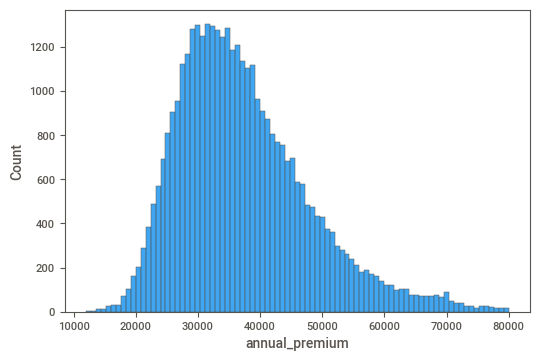

In [155]:
aux00 = aux.loc[aux['response'] == 1, 'annual_premium']
sns.histplot(aux00)

In [168]:
# 'driving_license'
aux = df4[['driving_license','response']].groupby('response').sum().reset_index()
aux['driving_license_perc'] = aux['driving_license']/aux['driving_license'].sum()
aux

,response,driving_license,driving_license_perc
0,0,333628,0.877283
1,1,46669,0.122717


In [191]:
# 'region_code'
aux0 = df4[['id','region_code','response']].groupby(['region_code','response']).count().reset_index()

<AxesSubplot:xlabel='region_code', ylabel='id'>

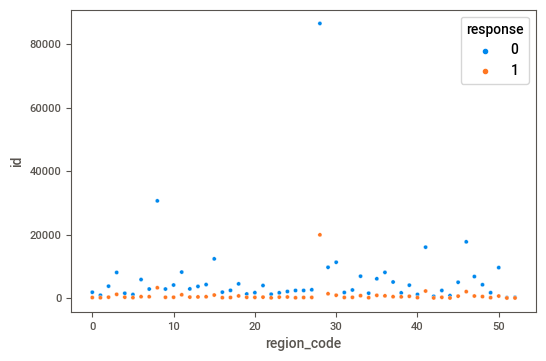

In [192]:
sns.scatterplot(x='region_code', y= 'id', hue = 'response', data=aux0)

<AxesSubplot:xlabel='region_code'>

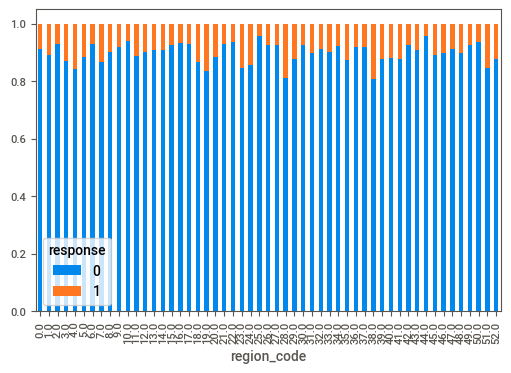

In [193]:
df_grouped = df4[["region_code", "response"]].groupby('region_code').value_counts(normalize=True).unstack('response')
df_grouped.plot.bar(stacked=True)

In [194]:
# 'previously_insured'
pd.crosstab(df4['previously_insured'],df4['response']).apply(lambda x: x / x.sum(), axis=1)

response,0,1
previously_insured,,
0,0.774546,0.225454
1,0.999095,0.000905


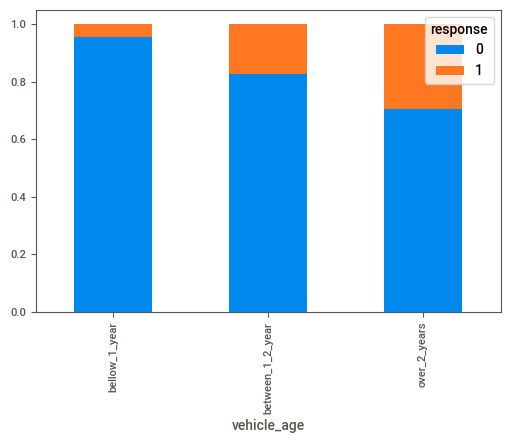

In [197]:
# 'vehicle_age'
df_grouped = df4[["vehicle_age", "response"]].groupby('vehicle_age').value_counts(normalize=True).unstack('response')
df_grouped.plot.bar(stacked=True);

In [278]:
# policy_sales_channel
aux0 = df4[['policy_sales_channel','response']].groupby('policy_sales_channel').sum().reset_index()
aux1 = aux0[aux0['response'] > 40.0]

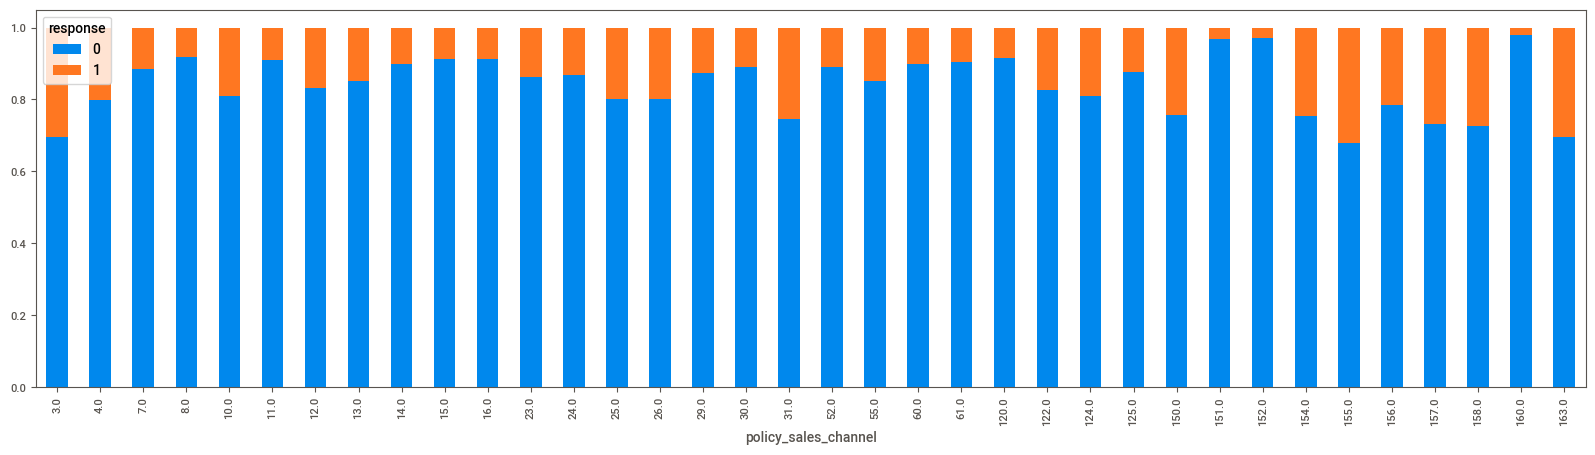

In [281]:
# 'policy_sales_channel'
aux2 = df4[df4['policy_sales_channel'].isin(aux1['policy_sales_channel'])]
df_grouped = aux2[["policy_sales_channel", "response"]].groupby('policy_sales_channel').value_counts(normalize=True).unstack('response')
df_grouped.plot.bar(stacked=True,figsize=(20,5));

<AxesSubplot:xlabel='policy_sales_channel', ylabel='response'>

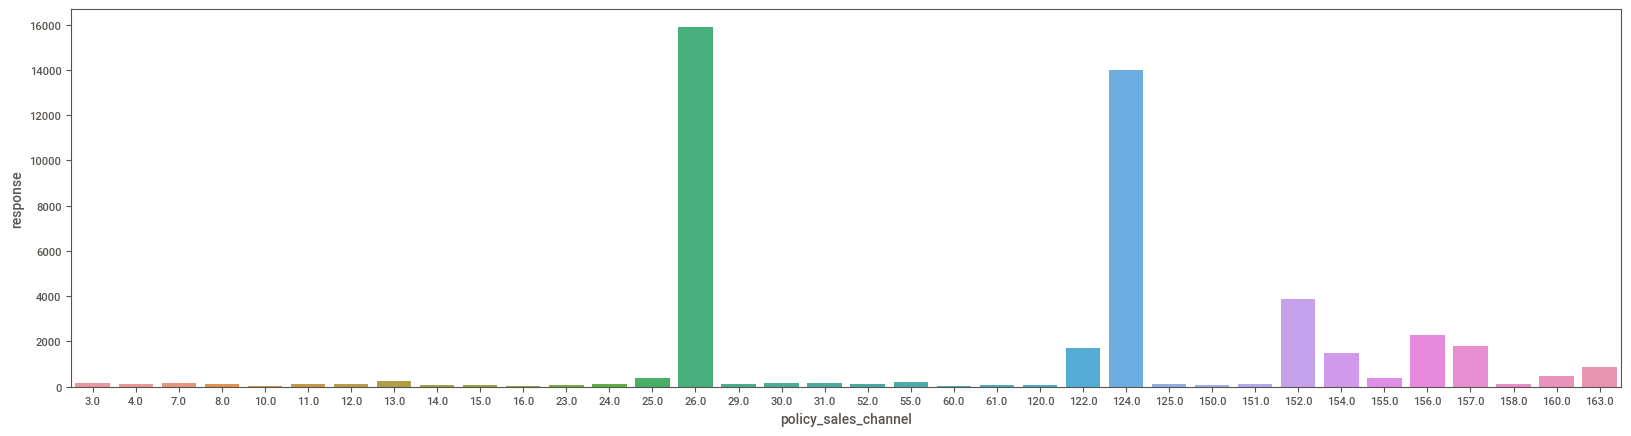

In [287]:
fig = plt.figure(figsize=(20,5))
aux = df4[["policy_sales_channel", "response"]].groupby('policy_sales_channel').sum().reset_index()
aux = aux[aux['response'] > 40]

sns.barplot(data=aux,x='policy_sales_channel',y='response')

In [215]:
d[d['policy_sales_channel'] == 123.0]

,policy_sales_channel,response
118,123.0,1


In [ ]:
# 'vehicle_damage'

In [ ]:
# 'vintage'

In [ ]:
# 'response'

# 5.0 Feature Selection

# 6.0 Data Preparation